# Clustering

Clustering is an unsupervised learning technique that divides the entire dataset into groups, or clusters, based on patterns in the data.

**K-means algorithm**

K-means clustering is one of the simplest and most popular machine learning algorithms. K-means groups the data into a defined number (k) of clusters.   
k-means algorithm:

1. Specify the number of clusters k
2. Select k random points from the data as the initial centroids
3. Allocate all other points to the nearest cluster centroid
4. Recompute the centroids of the new clusters
5. Repeat steps 3 and 4, until either:
  -  the centroids have stabilized (don't change between interations) or
  - the maximum number of iterations have completed

## Import Libraries & Read In Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [2]:
processed_df = pd.read_csv('../data/processed.csv', index_col=0)
processed_df.head()                        

,Study,PayScheme,Trials,FreqGoodDecks,AhaMoment,CumOutTrial95,NetOut
Subj_1,Fridberg,1,-0.698836,1.421697,-1.982720,1.248889,1.044988
Subj_2,Fridberg,1,-0.698836,-0.412875,0.962299,-0.361638,-0.414346
Subj_3,Fridberg,1,-0.698836,-0.223092,-0.351633,-0.427824,-0.474318
Subj_4,Fridberg,1,-0.698836,-0.096570,-0.351633,-0.229266,-0.294400
Subj_5,Fridberg,1,-0.698836,0.599302,-0.532865,0.322284,0.205371


## Choosing the Number of Clusters

To choose an appropiate number of clusters, we will use two common methods, the elbow method and the silhouette coefficient. 

### The Elbow Method

Involves running several k-means, incrementing k with each iteration, and note the Sum of the Squared Error (SSE) each time.

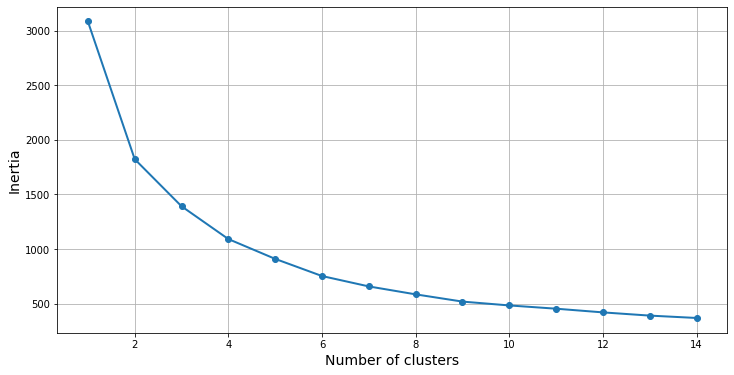

In [3]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(processed_df.iloc[:,2:])
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', lw=2)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.grid()
plt.show()

Inertia decreases as the number of clusters increase. We're looking for the sweet spot (elbow point) where the curve starts to bend. Here, the elbow looks to be located at k = 2.

**Confirm Elbow using kneed**

In [4]:
kl = KneeLocator(range(1, 15), SSE, curve="convex", direction="decreasing")
print('Elbow at k = ' + str(kl.elbow))

Elbow at k = 4


### The Silhouettee coefficient